In [72]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# Load joined dataframe
df = pd.read_csv('csv/metadata_text_merged.csv')
# Remove rows with empty text column for now
df = df.dropna(subset=['text'])

# Basic Cleaning
From https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/

- lowercasing
- punctuation removal
- removal of stopwords
- removal of very infrequent words (< 5 occurrences)

In [23]:
# lowercasing
df['text_cleaned'] = df['text'].apply((lambda x: " ".join(x.lower() for x in x.split())))
# remove puctuation
df['text_cleaned'] = df['text_cleaned'].str.replace('[^\w\s]','')
# stopword removal
stop = stopwords.words('english')
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [37]:
# Get list of words that appear less than 5 times
freq = pd.Series(' '.join(df['text_cleaned']).split()).value_counts()
least_frequent = list(freq[freq < 5].index)
# Filter out least frequent words from text
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in least_frequent))

In [41]:
# Save processed dataframe
df.to_csv('csv/metadata_text_merged_cleaned.csv', index=False)

# Word2vec

In [44]:
# Train word2vec model to produce word embeddings based on our corpus

# define training data
sentences = [letter.lower().split() for letter in df['text_cleaned'].tolist()]# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# save model
# model.save('model.bin')
# load model
# new_model = Word2Vec.load('model.bin')

Word2Vec(vocab=4650, size=100, alpha=0.025)


In [73]:
# Get closest words in vector space to pyrate
model.wv.most_similar('pyrate')

[('axim', 0.9955841302871704),
 ('curranteers', 0.9954705238342285),
 ('informes', 0.9932074546813965),
 ('aguaffos', 0.9925357699394226),
 ('brandenburgs', 0.9924197793006897),
 ('thence', 0.992390513420105),
 ('going', 0.9917852878570557),
 ('adoomes', 0.9907740354537964),
 ('island', 0.9907272458076477),
 ('van', 0.9904931783676147)]

In [94]:
# Get list of words that appear more than 100 times so we can narrow down the number of terms
more_than_100 = list(freq[freq > 100].index)

def pca_plot(model, subset=more_than_100):
    "Creates PCA dimensionality reduction of Word2vec model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        if word in subset:
            tokens.append(model[word])
            labels.append(word)
    
    pca_model = PCA(n_components=2)
    new_values = pca_model.fit_transform(tokens)
    
    # Print percent variance explained
    print pca_model.explained_variance_ratio_

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(32, 32)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/Users/harryxue/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


[0.37113447 0.19023773]


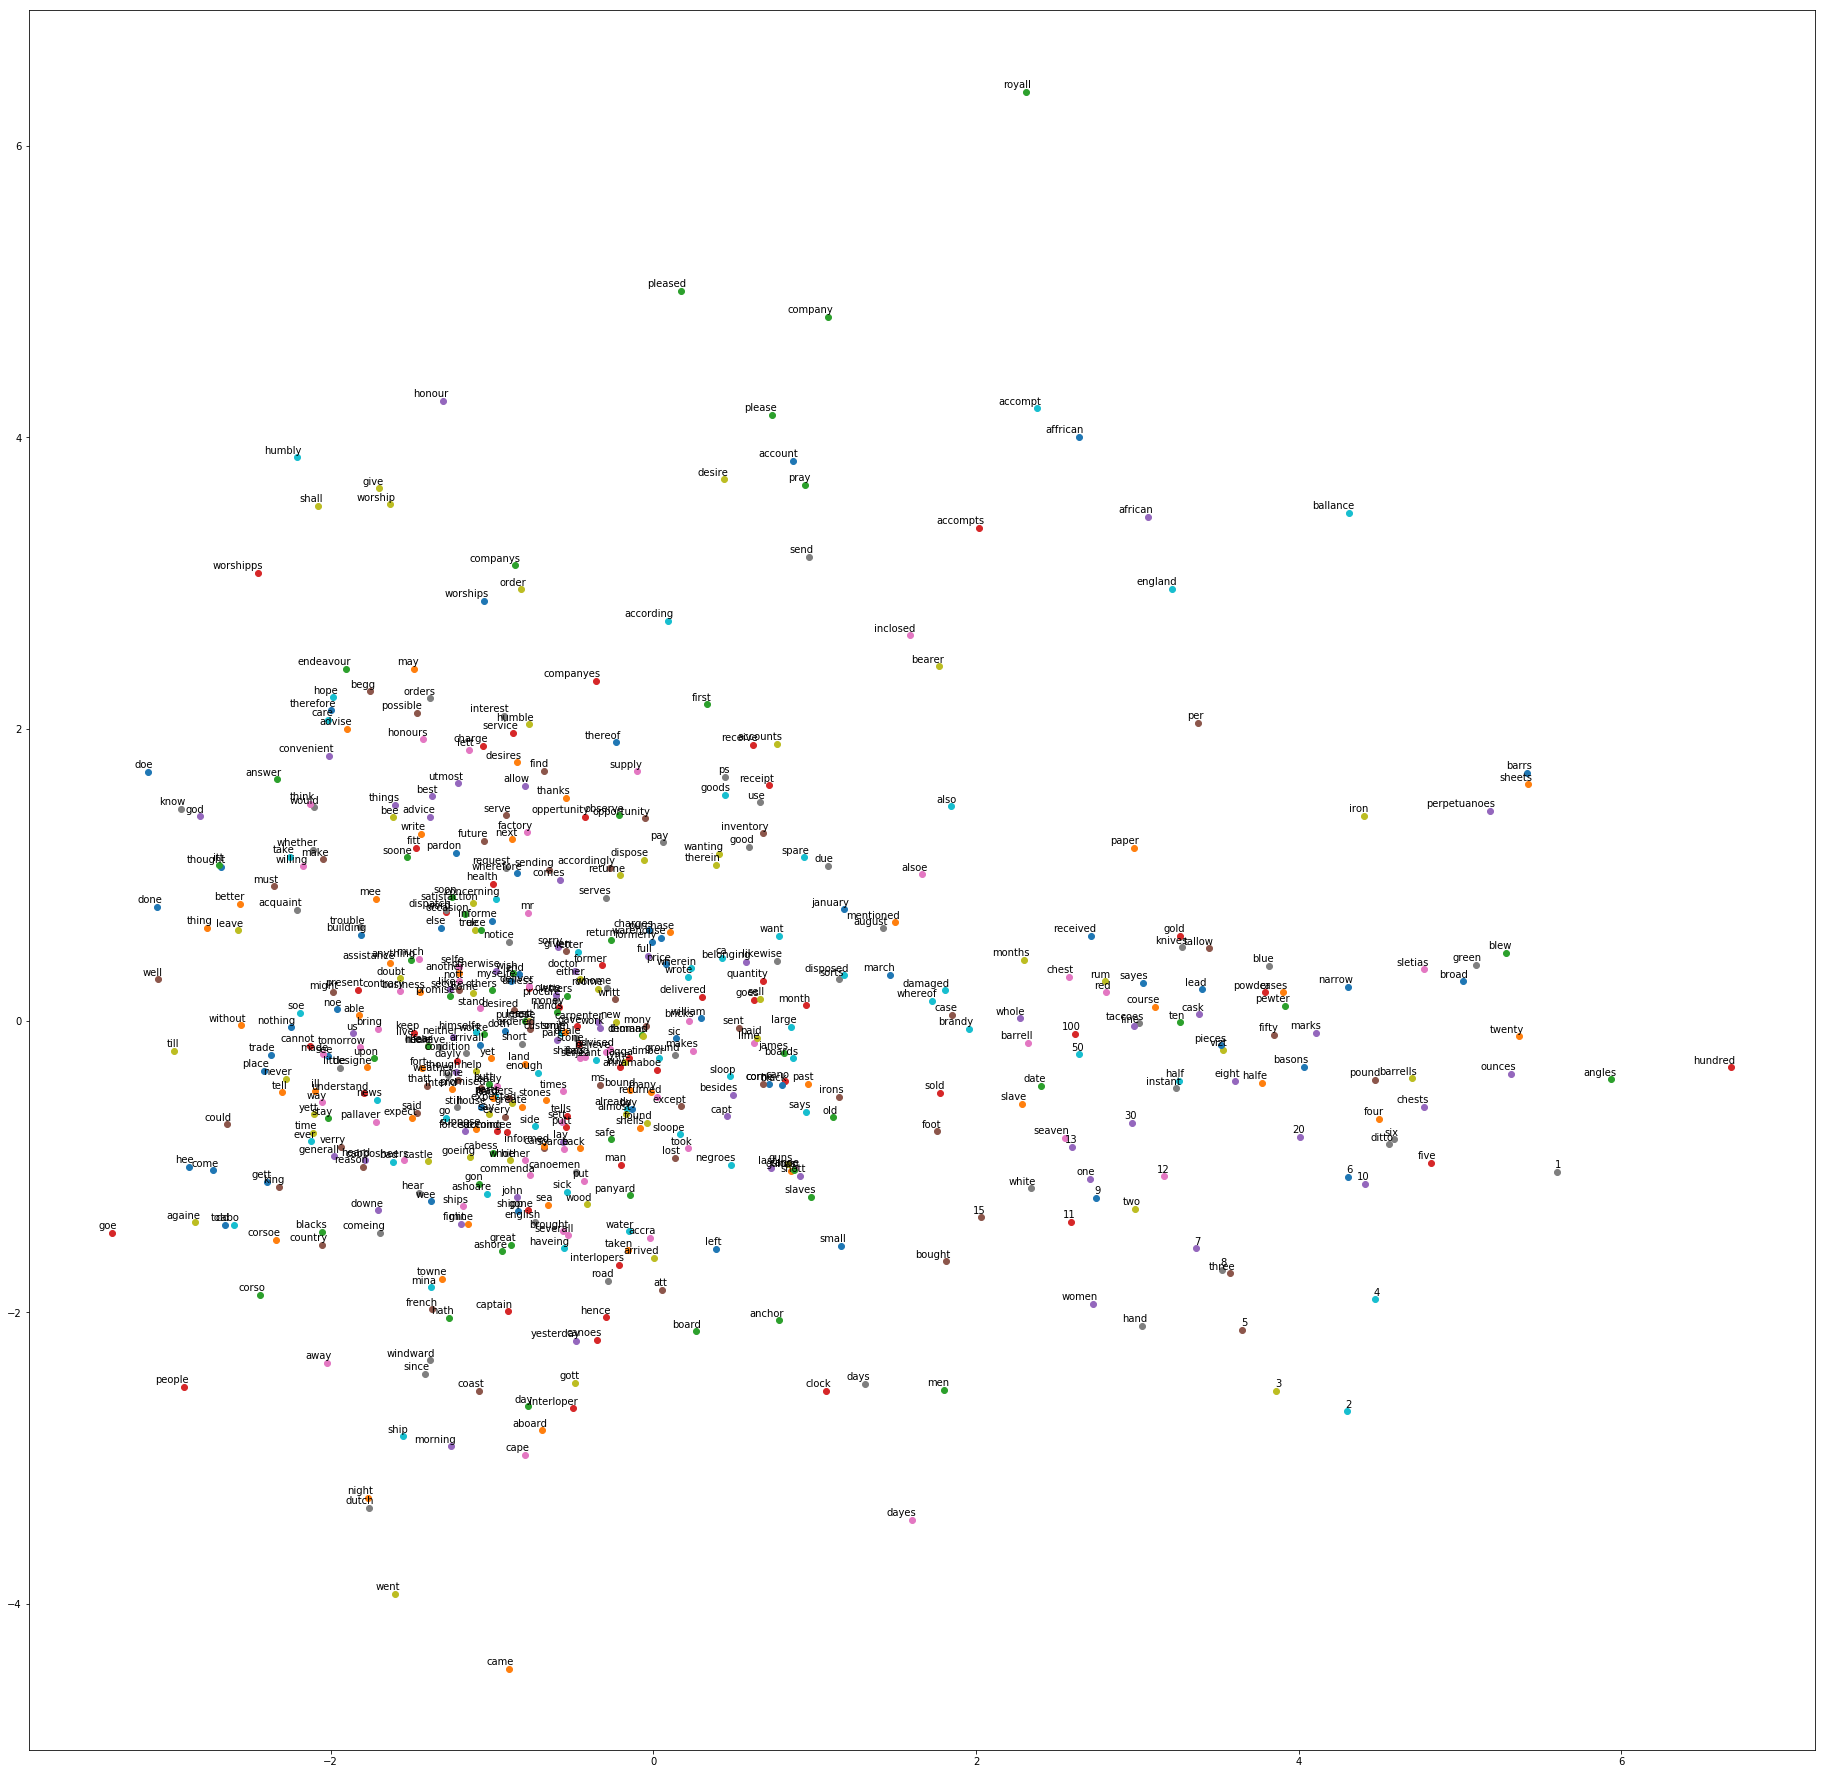

In [95]:
pca_plot(model)